## *Index* : *1900405*

# Random Forrest algorithm investigation 

### Decision tree

Decision tree is the building block of the Random forrest . it is a supervised learning method.

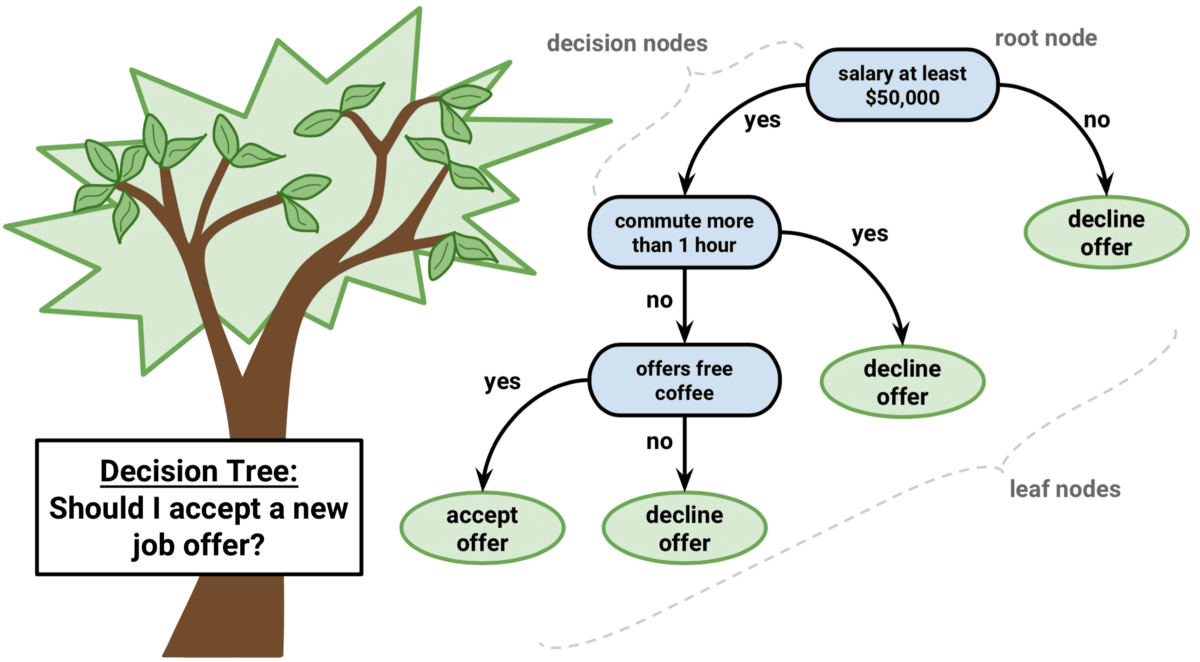

Above is a example of a decision tree , leaf nodes gives the output of the algorithm . fallowing diagram explains what are the component of a Decision tree . 

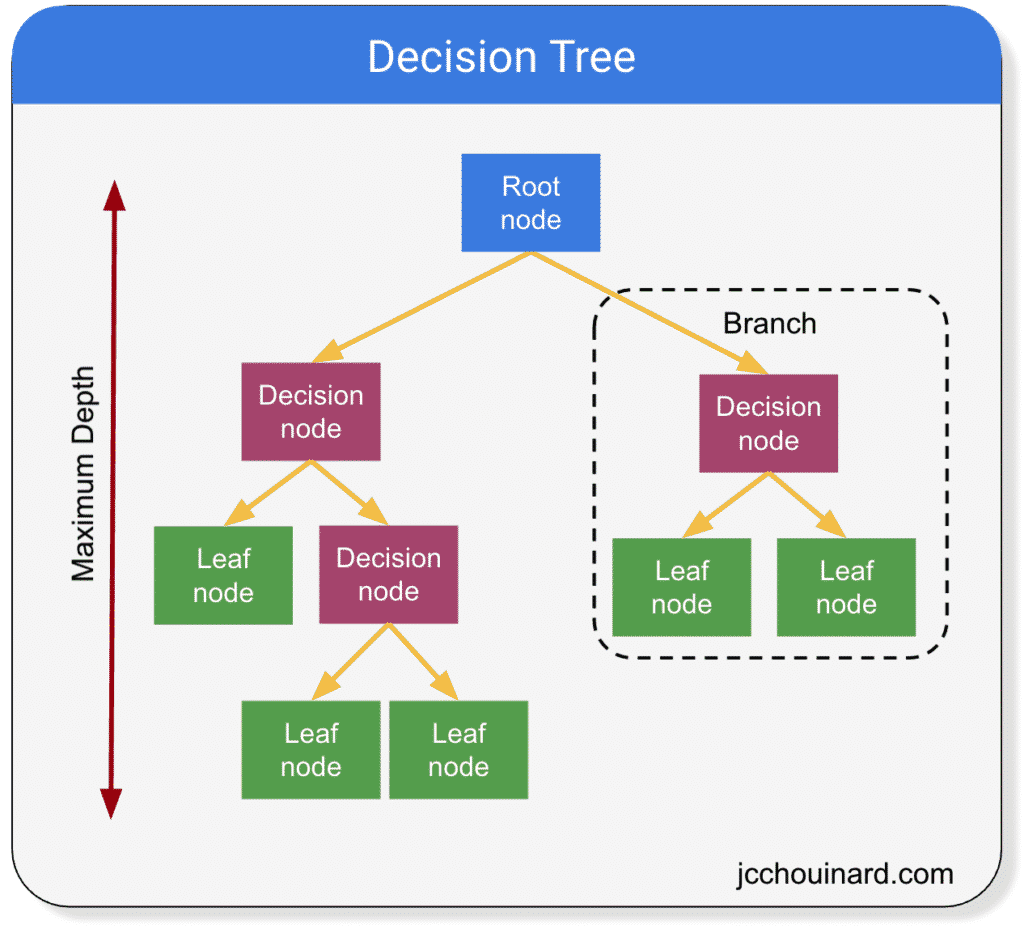

Decision nodes decide which path should take after a decision . this algorithm is pretty straight forward and intitute algorthm . Accuracy of this algorithm depend on the order of decision nodes . Decision tree can be aplicable for numerical as well categorical data .

### Random Forrest 

Random forrest is made with combination of several decision trees .Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction .Most voted decision will be the final result. Fallowing is a example of a random forrest



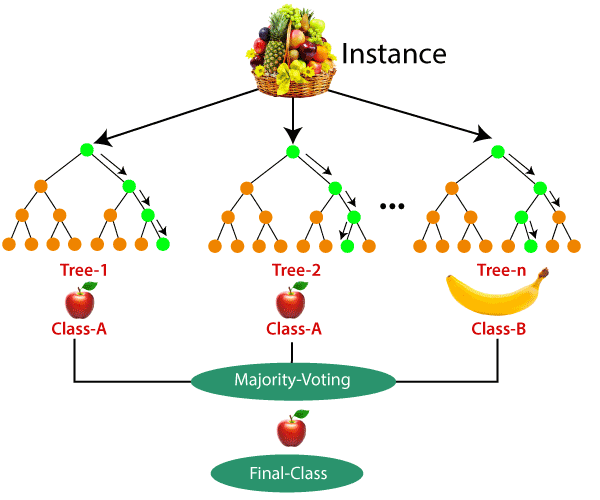


In [158]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=["sepal_length","sepal_width","petal_length","petal_width","class"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Dataset 

[Link ](https://archive.ics.uci.edu/ml/datasets/iris) 

My chosen dataset is iris data set . it has 5 instances
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: [Iris Setosa , Iris Versicolour, Iris Virginica]

as well as it has 150 instances . And all lengths are messured from centemeters.

#### let's finds out if the data set have missing values

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


It shows the there is no missing values let's check again if the dataset have missing values .

In [160]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

Above out put says it does not have any missing values .

# objective of the dataset

this data set can use to determine the class of a flower according to 
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

### let's find out how many unique type of data in class field .

In [161]:
df['class'].nunique()

3

above output says it has 3 different classes of the output variable 

### Now let's find out what are those outputs .

In [162]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Now find out the correlation ship in between attributes

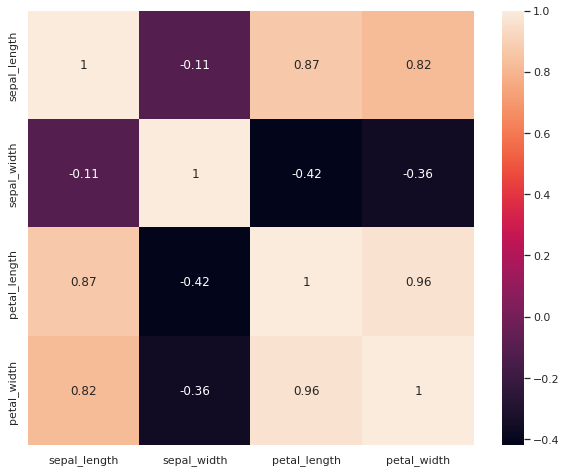

In [163]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
corr=df.corr()
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr,annot=True,ax=ax)

Now let's comparison the distribution of the data set 

1. Sepal length vs class

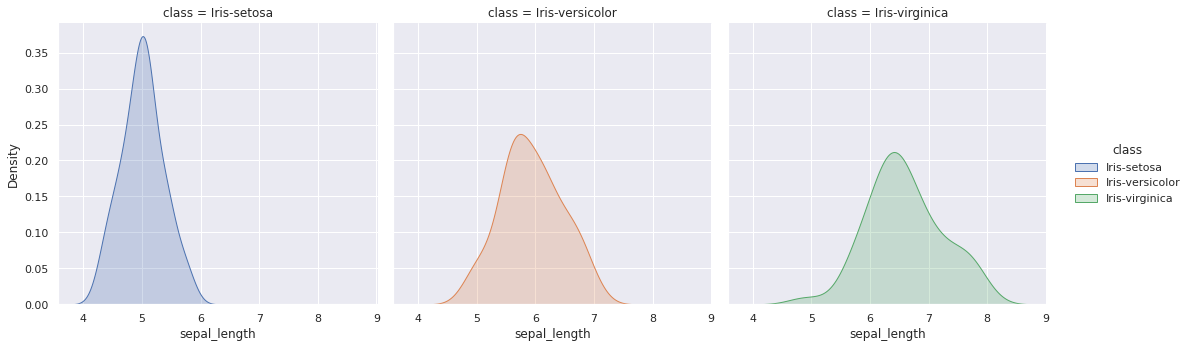

In [164]:
sns.displot(df, x="sepal_length", hue="class", kind="kde", fill=True,col="class")

2. Sepal width vs class

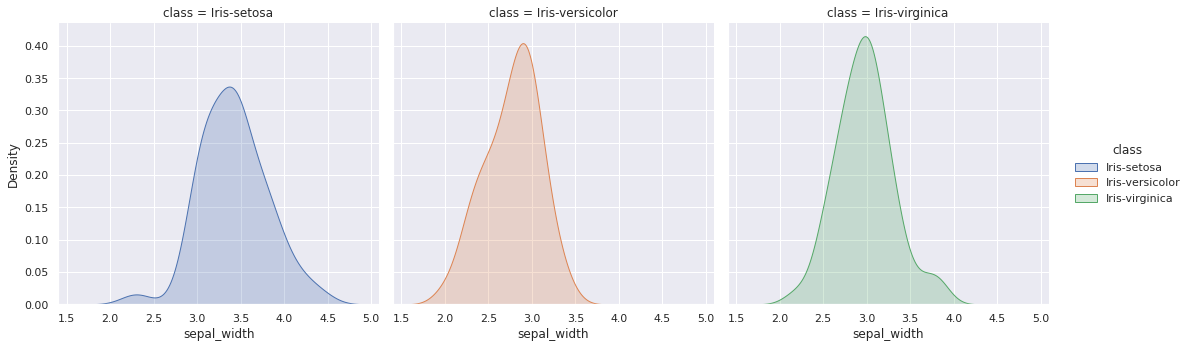

In [165]:
sns.displot(df, x="sepal_width", hue="class", kind="kde", fill=True,col="class")


3. Petal length vs class

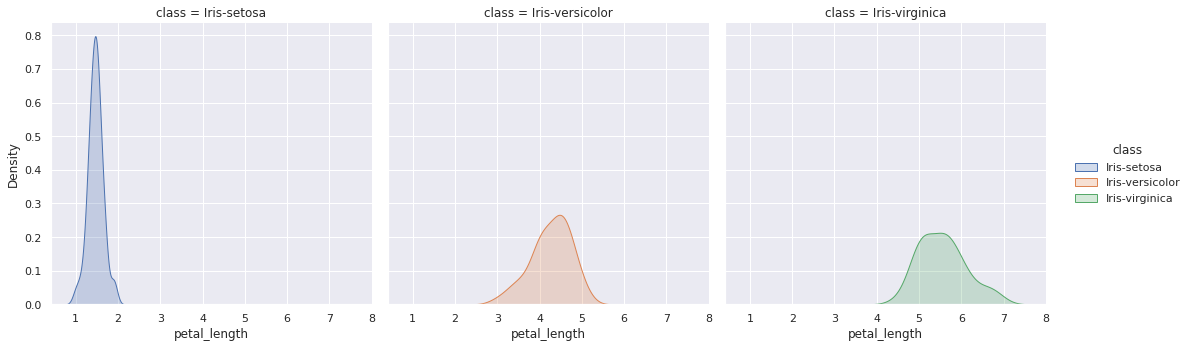

In [166]:
sns.displot(df, x="petal_length", hue="class", kind="kde", fill=True,col="class")


4. Petal width vs class

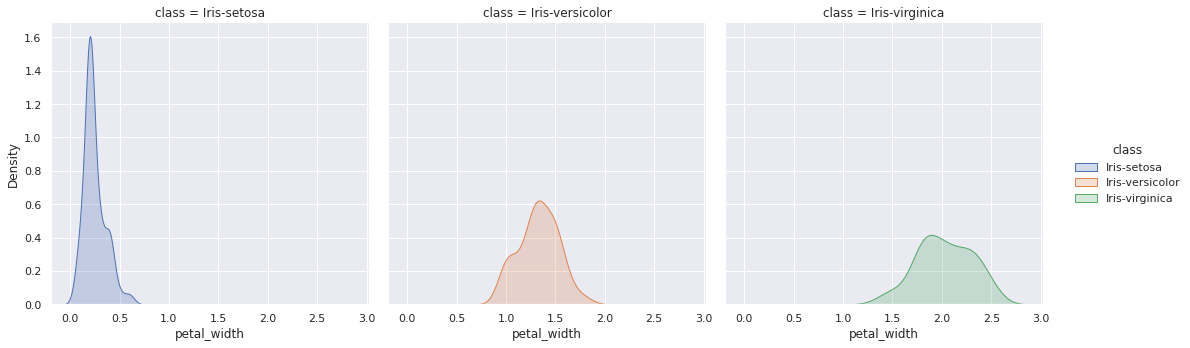

In [167]:
sns.displot(df, x="petal_width", hue="class", kind="kde", fill=True,col="class")

###All attributes are messured in centemeters as well there is no big scale difference so feature scalling is not required



---



### output class type are string values machine learning algorithms can not detect non numeral values so let's convert them into numeral values .

In [168]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Now out put variable is also a numeral values 

let's separate data set to inputs , output and for testing the model

In [169]:
X=df.drop(columns=['class'])
y=df['class']

In [170]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [171]:
from sklearn .ensemble import RandomForestClassifier;

### Now let's train the data set 

In [172]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred_random_forest=model.predict(x_test)
acc_random_forest=round(model.score(x_train,y_train)*100,2)
print('Accuracy is ',acc_random_forest,"%")

Accuracy is  100.0 %


### According to our data set model gives 100% accuracy .

[Link To code](https://colab.research.google.com/drive/1et0c8ISxUsxTVY7V6qVDbhwLqBv_FMtg?usp=sharing)